# Test RatInABox 
1. Start with default values
2. Adjust parameters for the environment
3. Adjust Agent parameters

In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import pandas as pd 
import numpy as np

# Save plot in specified directory
path = "../latex/figures/"
ratinabox.stylize_plots()
ratinabox.autosave_plots = False
ratinabox.figure_directory = path 

In [4]:
# Environment parameters
squeeze_box = [[0.0,0.0], [0.0,1.2], [1.6,0.8], [1.6, 0.4]]
wall_1 = [[0.0,0.6], [0.6,0.6]]
wall_2 = [[1.2, 0.6], [1.6, 0.6]]
env_params = {"boundary":squeeze_box}

# Agent parameters
start_pos = np.array([0.5, 0.5])
ag_params = {"speed_mean": 0.2, "thigmotaxis":1.0}

,t,pos,vel,rot_vel,head_direction
0,0.1,"[0.8799970421391105, 0.6069341029103371]","[-0.057658011978347634, 0.036850500560872135]",1.289924,"[-0.8186954020718089, 0.5742280371302667]"
1,0.2,"[0.8777076846603928, 0.6083443398558197]","[-0.02289357478717613, 0.014102369454825903]",0.165795,"[-0.84084692770997, 0.5412729848798149]"
2,0.3,"[0.8738377145576388, 0.6092388717830857]","[-0.03869970102754028, 0.008945319272659624]",3.249553,"[-0.9422274798078994, 0.334973694929698]"
3,0.4,"[0.8708339861779226, 0.6099026771785531]","[-0.030037283797161862, 0.006638053954673984]",0.096581,"[-0.9666890297154124, 0.25595374548514543]"
4,0.5,"[0.8687260837868419, 0.6105700056684115]","[-0.021079023910807182, 0.0066732848985839865]",-0.891099,"[-0.9580491235541694, 0.2866040419412955]"
5,0.6,"[0.8654490565968227, 0.6115121177819373]","[-0.032770271900192105, 0.009421121135257948]",0.266664,"[-0.9600766053162556, 0.2797372194121023]"
6,0.7,"[0.8639052792094915, 0.6111508714040444]","[-0.015437773873312466, -0.003612463778928099]",5.098285,"[-0.9981737634070438, -0.060408095863212]"
7,0.8,"[0.8622302356793138, 0.6105276068785378]","[-0.016750435301776667, -0.006232645255066505]",1.263553,"[-0.9669156687767818, -0.2550962357110518]"
8,0.9,"[0.8582973051127515, 0.6080394077041598]","[-0.03932930566562298, -0.024881991743780363]",2.078633,"[-0.8949855642311961, -0.44609510176392597]"
9,1.0,"[0.8481153976907644, 0.6071539160958559]","[-0.10181907421987102, -0.008854916083038677]",-4.773488,"[-0.9777584845583596, -0.20973398836178178]"


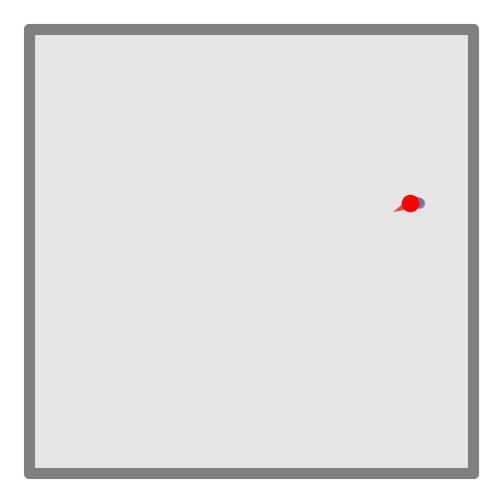

In [22]:
# Test with default parameters and a set starting position
Env = Environment()
Ag = Agent(Env)
Ag.dt = 0.1

# for i in range(int(60 / Ag.dt)):
for i in range(int(1 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()
df = pd.DataFrame(Ag.history)
df

(<Figure size 960x720 with 1 Axes>, <Axes: >)

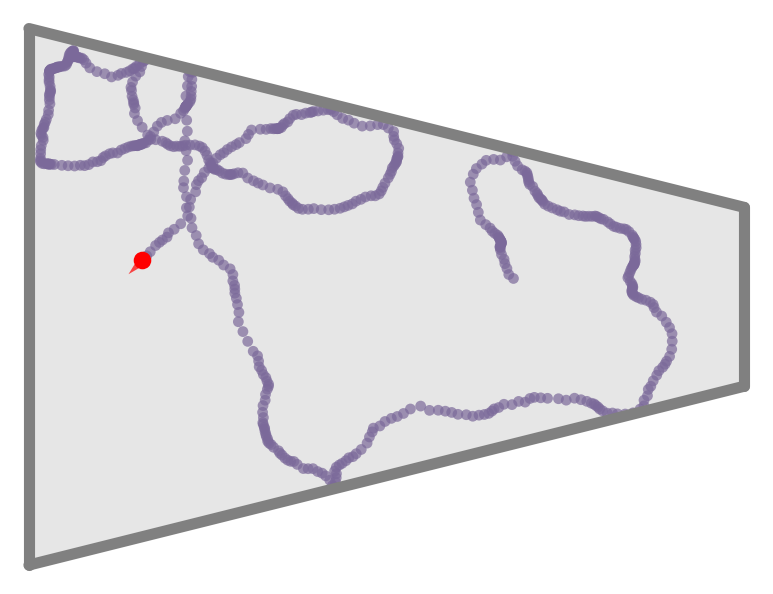

In [6]:
Env = Environment(params={"boundary":squeeze_box})
Ag = Agent(Env)

for i in range(int(60 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()

(<Figure size 960x720 with 1 Axes>, <Axes: >)

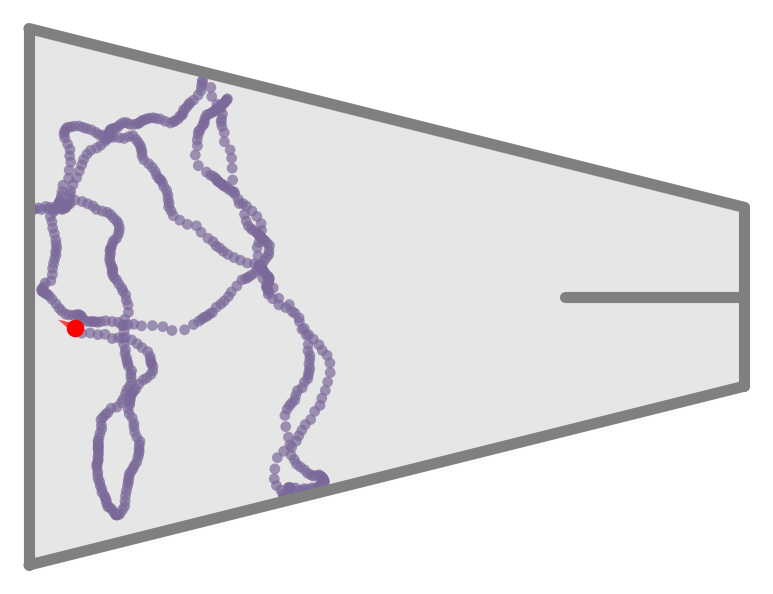

In [7]:
Env = Environment(params={"boundary":squeeze_box})
Env.add_wall(wall_2)

Ag = Agent(Env)

for i in range(int(60 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()

4. Make general function to generate data

In [8]:
def simulate(env_params, ag_params, write=False):
    Env = Environment(params=env_params)
    Ag = Agent(Env, params=ag_params)

    for i in range(int(60 / Ag.dt)):
        Ag.update()
    
    Ag.plot_trajectory()

    data = pd.DataFrame(Ag.history)

    if write is True:
        data.to_csv("../data/out.csv")

Possible function